/Users/ge/opt/anaconda3/envs/plan2vec/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Creating offscreen glfw


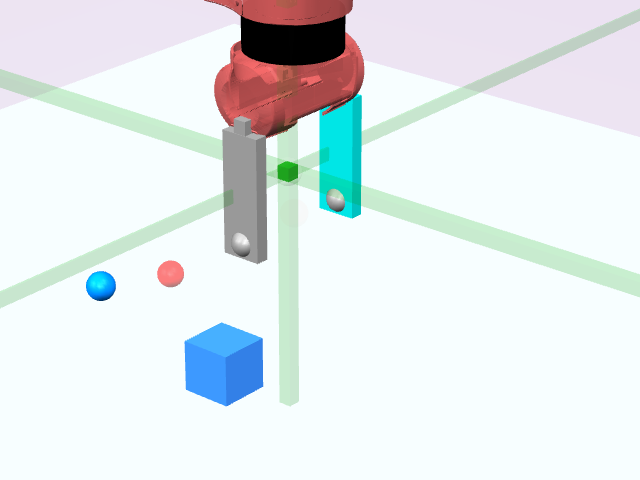

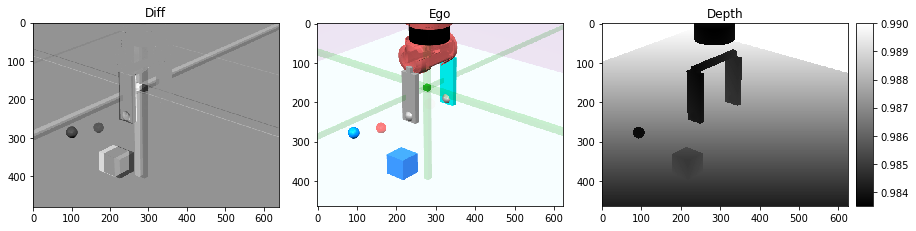

In [2]:
# %load_ext autoreload
# %autoreload 2

import gym
from PIL import Image
import matplotlib.pyplot as plt

env = gym.make("gym_sawyer:PickPlace-v0", cam_id=0, width=100, height=100,
              action_scale=2/100)
env.reset()

env.step([0, 1, -1, -1])
old_img, depth = env.render('rgbd')
env.step([1, 0, 0, -1])
img, depth = env.render('rgbd')

fig = plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.title("Diff")
plt.imshow((img.astype(float) - old_img.astype(float)).mean(axis=-1), cmap='gray')
plt.subplot(132)
plt.title("Ego")
plt.imshow(img[8:-8, 8:-8])
ax = plt.subplot(133)
plt.title("Depth")
im = plt.imshow(depth[8:-8, 8:-8], cmap="gray", vmax=0.990)
plt.tight_layout()
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax) # Similar to fig.colorbar(im, cax = cax)

# plt.show()

from ml_logger import logger
# logger.savefig(f"../figures/{env.spec.id}.png")
Image.fromarray(img)

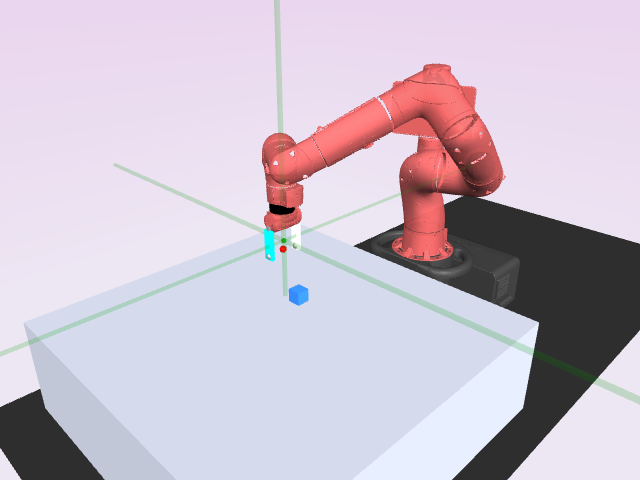

In [5]:
img = env.render('rgb', width=640,  height=480, cam_id=-1)
# logger.save_image(img, f"../figures/{env.spec.id}-human.png")
Image.fromarray(img)

In [5]:
for i in range(28):
    print(i, env.sim.model.body_id2name(i))

0 world
1 base
2 torso
3 pedestal
4 right_arm_base_link
5 right_l0
6 head
7 screen
8 head_camera
9 right_torso_itb
10 right_l1
11 right_l2
12 right_l3
13 right_l4
14 right_arm_itb
15 right_l5
16 right_hand_camera
17 right_wrist
18 right_l6
19 right_hand
20 hand
21 frame
22 rightclaw
23 leftclaw
24 right_l4_2
25 right_l2_2
26 right_l1_2
27 mocap


/Users/ge/opt/anaconda3/envs/plan2vec/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Creating offscreen glfw


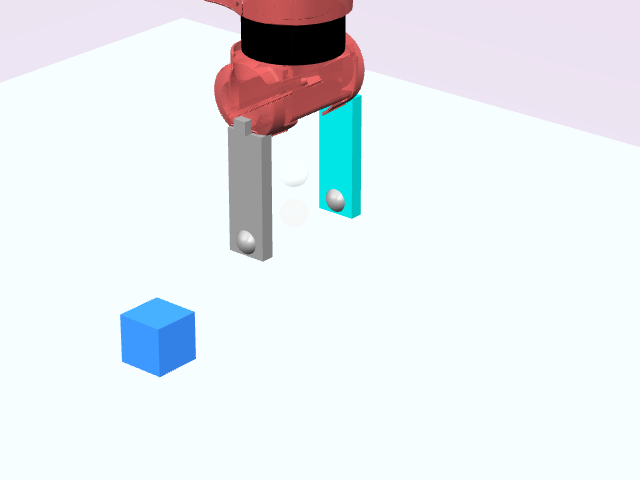

In [1]:
import gym

env = gym.make("gym_sawyer:PickPlace-v0", cam_id=0, width=100, height=100,
              action_scale=2/100)
env.reset()
env.sim.model.geom_rgba[-6:-1] = 0
env.render('notebook')